In [78]:
import pandas as pd
import numpy as np
import os
import json

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import os
import json
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
from tqdm import tqdm
import glob
import pickle

In [2]:
!ls

challenge-2019-classes-description-500.csv
challenge-2019-label500-hierarchy.json
challenge-2019-train-detection-bbox.csv
challenge-2019-train-detection-human-imagelabels.csv
challenge-2019-validation-detection-bbox.csv
challenge-2019-validation-detection-human-imagelabels.csv
eda.ipynb
eda-top-classes.ipynb
merge_bottom400-001_sub0704-001_cas400-500-005.zip
merge_bottom400-200box_sub0704-001.csv.zip
merge_df.ipynb
sample_submission.csv
sub
sub_bottom400_0707_200boxes.csv
sub_cas_0707_400-500_1_005.csv
submit-top-classes.ipynb
test.pkl
top_classes.csv
train_0-e_0-100.pkl
train_0-e_0-50.pkl
train_0-e_100-200.pkl
train_0-e_200-300.pkl
train_0-e_300-400.pkl
train_0-e_400-500.pkl
train_0-e_50-100.pkl
train_0-e_all.pkl
train_0-e_bottom-400.pkl
Untitled.ipynb
val.pkl


In [141]:
df_val = pd.read_csv('challenge-2019-validation-detection-bbox.csv')
print(df_val.shape)
print(df_val.head())

(226811, 7)
            ImageID LabelName      XMin      XMax      YMin      YMax  \
0  0001eeaf4aed83f9  /m/0cmf2  0.022673  0.964200  0.071038  0.800546   
1  000595fe6fee6369  /m/02xwb  0.141384  0.179676  0.676275  0.731707   
2  000595fe6fee6369  /m/02xwb  0.213549  0.253314  0.299335  0.354767   
3  000595fe6fee6369  /m/02xwb  0.232695  0.288660  0.490022  0.545455   
4  000595fe6fee6369  /m/02xwb  0.245950  0.291605  0.547672  0.605322   

   IsGroupOf  
0          0  
1          0  
2          0  
3          0  
4          0  


In [144]:
df_val.LabelName.value_counts()

/m/01g317     16753
/m/083wq      14383
/m/0dzf4      11711
/m/0k4j        9924
/m/03q69       9567
/m/09j5n       9110
/m/04hgtk      8765
/m/04yx4       8493
/m/07j7r       8077
/m/0d4v4       7583
/m/0h9mv       6742
/m/0c9ph5      5825
/m/035r7c      5818
/m/0dzct       5594
/m/014sv8      5450
/m/0k65p       5031
/m/03bt1vf     4767
/m/0k0pj       4499
/m/05r655      3622
/m/01prls      3053
/m/0283dt1     2752
/m/0cgh4       2613
/m/07yv9       2388
/m/02xwb       2195
/m/0bt9lr      1937
/m/04brg2      1388
/m/01d40f      1288
/m/0c_jw       1274
/m/0f4s2w      1189
/m/0270h       1158
              ...  
/m/09dzg          8
/m/06_72j         8
/m/0h8lkj8        7
/m/0lt4_          7
/m/0frqm          7
/m/0584n8         7
/m/01h44          7
/m/0h8n27j        7
/m/01kb5b         6
/m/02lbcq         6
/m/05kms          6
/m/09gtd          5
/m/02x8cch        4
/m/02d1br         4
/m/0152hh         4
/m/02ctlc         3
/m/01bms0         3
/m/0h8n6ft        3
/m/076lb9         2


In [3]:
df_des = pd.read_csv('challenge-2019-classes-description-500.csv', names=['label', 'name'])
df_des.head()

,label,name
0,/m/061hd_,Infant bed
1,/m/06m11,Rose
2,/m/03120,Flag
3,/m/01kb5b,Flashlight
4,/m/0120dh,Sea turtle


In [4]:
len(df_des)

500

In [56]:
df_train = pd.read_csv('challenge-2019-train-detection-bbox.csv')
df_train.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,8d6dec80235b6fea,xclick,/m/09j5n,1,0.760000,0.778125,0.645892,0.673277,0,0,0,0,0
1,8d6dec80235b6fea,xclick,/m/09j5n,1,0.817500,0.831875,0.628895,0.661945,0,0,0,0,0
2,8d6dec80235b6fea,xclick,/m/09j5n,1,0.843125,0.870000,0.619452,0.645892,0,0,0,0,0
3,8d6dec80235b6fea,xclick,/m/09j5n,1,0.867500,0.891875,0.597734,0.625118,0,0,0,0,0
4,8d6dec80235b6fea,xclick,/m/09j5n,1,0.895625,0.911250,0.625118,0.656280,0,0,0,0,0


In [131]:
def get_top_classes(start_index, end_index):
    df = pd.read_csv('top_classes.csv')
    c = df['class'].values[start_index:end_index]
    #print(df.head())
    stoi = { c[i]: i for i in range(len(c)) }
    return c, stoi
classes, stoi = get_top_classes(400, 500)

class_dict = {}
for i, c in enumerate(classes):
    n = df_des.loc[df_des.label == c].name.values[0]
    class_dict[i+1] = n

In [128]:
classes[:20]

array(['/m/01jfm_', '/m/0h2r6', '/m/01n4qj', '/m/015qff', '/m/0cvnqh',
       '/m/0hnnb', '/m/02wbtzl', '/m/014y4n', '/m/01j61q', '/m/018xm',
       '/m/0ftb8', '/m/01xygc', '/m/04gth', '/m/0167gd', '/m/0dv5r',
       '/m/050k8', '/m/07j87', '/m/02rdsp', '/m/0cyhj_', '/m/05zsy'],
      dtype=object)

In [129]:
[class_dict[i] for i in range(1, 51)]

['Vehicle registration plate',
 'Van',
 'Shirt',
 'Traffic light',
 'Bench',
 'Umbrella',
 'Sun hat',
 'Paddle',
 'Tent',
 'Ball',
 'Sunflower',
 'Coat',
 'Lavender',
 'Doll',
 'Camera',
 'Mobile phone',
 'Tomato',
 'Office supplies',
 'Orange',
 'Pumpkin',
 'Traffic sign',
 'Computer monitor',
 'Stairs',
 'Candle',
 'Cake',
 'Roller skates',
 'Lantern',
 'Plate',
 'Box',
 'Coffee cup',
 'Coffee table',
 'Bookcase',
 'Watercraft',
 'Football',
 'Office building',
 'Maple',
 'Curtain',
 'Kitchen appliance',
 'Muffin',
 'Canoe',
 'Computer keyboard',
 'Swan',
 'Bowl',
 'Mushroom',
 'Cocktail',
 'Drawer',
 'Castle',
 'Couch',
 'Christmas tree',
 'Taxi']

In [7]:
# visualize

import numpy as np
import PIL.Image as Image
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont

INDIGO = (75, 0, 130)


def draw_bounding_box_on_image(
    image,
    x_min,
    y_min,
    x_max,
    y_max,
    color,
    thickness=4,
    display_str_list=(),
    use_normalized_coordinates=False,
    fontsize=20
):
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    if use_normalized_coordinates:
        (left, right, top, bottom) = (x_min * im_width, x_max * im_width, y_min * im_height, y_max * im_height)
    else:
        (left, right, top, bottom) = (x_min, x_max, y_min, y_max)
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=thickness, fill=color)
    try:
        font = ImageFont.truetype('DejaVuSansMono.ttf', fontsize)
    except IOError:
        font = ImageFont.load_default()

    # If the total height of the display strings added to the top of the bounding
    # box exceeds the top of the image, stack the strings below the bounding box
    # instead of above.
    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
    # Each display_str has a top and bottom margin of 0.05x.
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = bottom + total_display_str_height
    # Reverse list and print from bottom to top.
    for display_str in display_str_list[::-1]:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, text_bottom - text_height - 2 * margin), (left + text_width, text_bottom)], fill=color)
        draw.text((left + margin, text_bottom - text_height - margin), display_str, fill=color, font=font)
        text_bottom -= text_height - 2 * margin


def draw_bounding_boxes_on_image_array(
    image, bboxes, color=INDIGO, thickness=4, use_normalized_coordinates=False, fontsize=20
):
    image_pil = Image.fromarray(image)
    draw_bounding_boxes_on_image(image_pil, bboxes, color, thickness, use_normalized_coordinates, fontsize)
    np.copyto(image, np.array(image_pil))


def draw_bounding_boxes_on_image(
    image, bboxes, color=INDIGO, thickness=4, use_normalized_coordinates=False, fontsize=20
):
    for bbox in bboxes:
        draw_bounding_box_on_image(
            image, bbox[0], bbox[1], bbox[2], bbox[3], color, thickness, (), use_normalized_coordinates, fontsize
        )


In [114]:
with open('train_0-e_400-500.pkl', 'rb') as f:
    annos = pickle.load(f)

In [115]:
annos[0]

{'filename': 'train_0/000060e3121c7305.jpg',
 'width': 1024,
 'height': 683,
 'ann': {'bboxes': array([[ 835.84   ,  462.80148, 1015.04   ,  579.94214]], dtype=float32),
  'labels': array([57])}}

In [116]:
IMG_DIR = '/mnt/chicm/data/open-images/train/imgs'
def get_annotated_img(anno):
    fn = os.path.join(IMG_DIR, anno['filename'])
    img = Image.open(fn)
    draw_bounding_boxes_on_image(img, anno['ann']['bboxes'])
    return img

In [117]:
def show_train(idx):
    labels = annos[idx]['ann']['labels']
    print([class_dict[x] for x in labels])
    plt.figure(figsize=(15, 10))
    plt.imshow(get_annotated_img(annos[idx]))

In [ ]:
show_train(11)

In [27]:
!ls /mnt/chicm/open-images/work_dirs/cascade_rcnn_x101_64x4d_fpn_1x/400-500

20190705_184708.log	  20190706_043924.log.json  epoch_2.pth  epoch_7.pth
20190705_184708.log.json  epoch_10.pth		    epoch_3.pth  epoch_8.pth
20190705_185403.log	  epoch_11.pth		    epoch_4.pth  epoch_9.pth
20190705_185403.log.json  epoch_12.pth		    epoch_5.pth  latest.pth
20190706_043924.log	  epoch_1.pth		    epoch_6.pth  preds_1.pkl


In [28]:
# submission

with open('/mnt/chicm/open-images/work_dirs/cascade_rcnn_x101_64x4d_fpn_1x/400-500/preds_1.pkl', 'rb') as f:
    preds = pickle.load(f)

In [29]:
len(preds[0][0])

0

In [30]:
preds[1]

[array([], shape=(0, 5), dtype=float32),
 array([[0.0000000e+00, 1.7669985e+01, 9.4412585e+02, 6.8086334e+02,
         1.4320776e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[0.0000000e+00, 1.7282343e+01, 9.3393054e+02, 6.7957642e+02,
         7.7419274e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[3.4899481e+02, 1.4772447e+02, 6.3023474e+02, 5.1814856e+02,
         5.7987526e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[0.0000000e+00, 2.3456245e+02, 4.3949500e+02, 4.6668582e+02,
         5.1837564e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5)

In [77]:
threshold=0.4


In [78]:
def get_preds(raw_pred):
    res = {
        'labels': [],
        'scores': [],
        'bboxes': []
    }
    for i, p in enumerate(raw_pred):
        if len(p) > 0:
            for e in p:
                #th = get_threshold(classes[i])
                if e[4] > threshold:
                    res['labels'].append(i)
                    res['scores'].append(e[4])
                    res['bboxes'].append(e[:4])
    res['labels'] = np.array(res['labels'])
    res['scores'] = np.array(res['scores'])
    res['bboxes'] = np.array(res['bboxes'])
    return res

In [56]:
df_test = pd.read_csv('sample_submission.csv')

In [87]:
TEST_IMG_DIR = '/mnt/chicm/data/open-images/test'
def show_preds(idx):
    plt.figure(figsize=(15, 10))
    p = get_preds(preds[idx])
    img_id = df_test.iloc[idx].ImageId
    fn = os.path.join(TEST_IMG_DIR, '{}.jpg'.format(img_id))
    img = Image.open(fn)
    draw_bounding_boxes_on_image(img, p['bboxes'])
    print(p['bboxes'])
    
    plt.imshow(img)
    labels = [classes[i] for i in p['labels']]
    labels = [df_des.loc[df_des.label==x].name for x in labels]
    print(labels)

[]


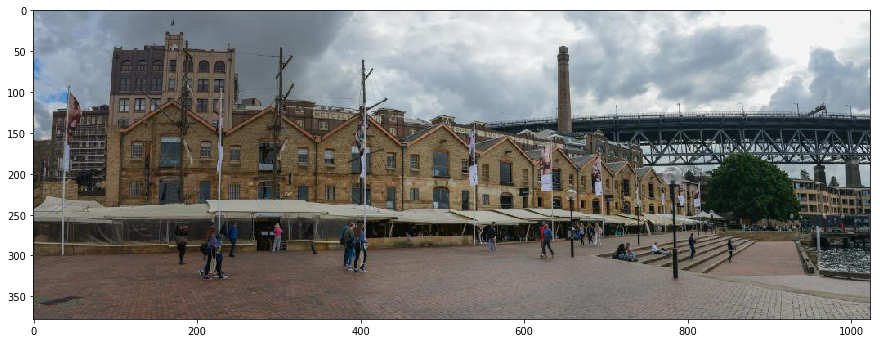

In [58]:
show_preds(22)

In [79]:
final_preds = []

for p in tqdm(preds, total=len(preds)):
    final_preds.append(get_preds(p))

100%|██████████| 99999/99999 [00:04<00:00, 22519.72it/s]


In [80]:
total_objs = 0
idx_with_objs = []
for i, p in enumerate(final_preds):
    total_objs += len(p['labels'])
    if len(p['labels']) > 0:
        idx_with_objs.append(i)
print(total_objs)
print(idx_with_objs[:20])

5165
[20, 43, 49, 54, 60, 110, 136, 151, 158, 177, 190, 253, 322, 332, 362, 387, 410, 438, 455, 469]


[[309.59042 299.6246  733.4653  520.4639 ]]
[235    Snowplow
Name: name, dtype: object]


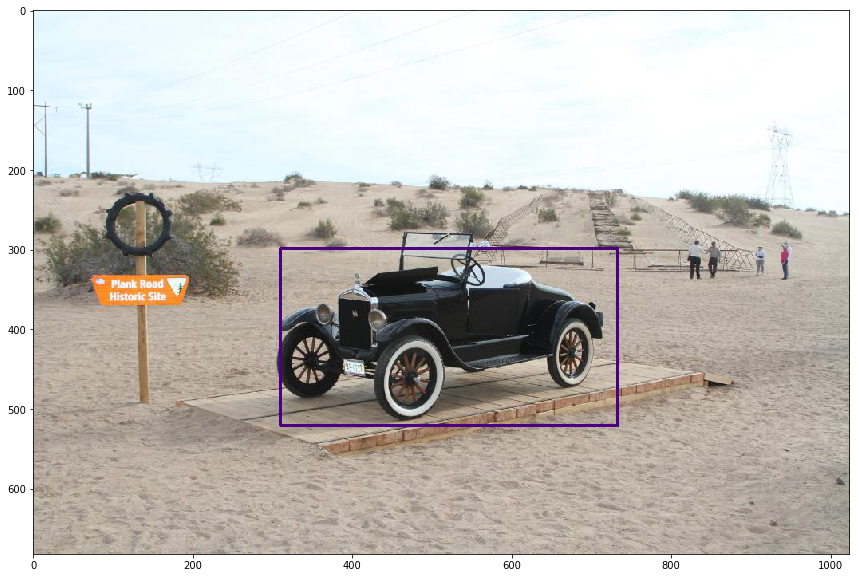

In [92]:
show_preds(158)

In [263]:
#from multiprocessing import Pool
#with Pool(50) as pool:
#    new_preds = list(tqdm(iterable=pool.map(get_preds, preds[:1000]), total=len(preds)))